# Unary Coding Demo

Unary coding is one of the simplest variable-length codes.
- A number `n` is encoded as `n` ones followed by a zero.
- It is a **prefix code**, meaning no codeword is a prefix of another.

In this demo, we'll implement encoding and decoding functions, and visualize some examples.

# Imports

In [1]:
import re

import matplotlib.pyplot as plt
import pandas as pd

from IPython.display import display

# Function Definitions

In this section, we define the core functions for unary coding:

- `unary_encode`
- `unary_decode`
- `unary_length`

These functions form the foundation for encoding, decoding, and analyzing unary codes throughout this demo.

## `unary_encode`

Encode a non-negative integer or a sequence of non-negative integers as unary code.

In [2]:
def unary_encode(numbers, collapse=True):
    if isinstance(numbers, int):
        num = numbers
        if num < 0:
            raise ValueError("number must be non-negative")
        return "1" * num + "0"
    
    try:
        codewords = [unary_encode(number) for number in numbers]
        if collapse: codewords = "".join(codewords)
        return codewords
    except TypeError:
        raise ValueError("Input must be an integer or an iterable of integers")

## `unary_decode`

Decode a unary codeword to a non-negative integer.

In [3]:
import re

def unary_decode(codewords, as_list=False):
    def single_decode(codeword):
        number = 0
        for bit in codeword:
            if bit == "1":
                number += 1
            elif bit == "0":
                return number
            else:
                raise ValueError("Invalid character in codeword")
        raise ValueError("No terminating 0 found in codeword")
    
    codeword_list = re.findall(r'[^0]*0', codewords)
    if not codeword_list:
        # no valid codewords found
        # pass the entire string to single_decode and let it handle it
        codeword_list = [codewords]
    
    symbols = [single_decode(codeword) for codeword in codeword_list]

    if not as_list and len(symbols) == 1:
        return symbols[0]
    return symbols

## `unary_length`

Return the length of the unary codeword for a non-negative integer n.

In [4]:
def unary_length(numbers, as_list=False):
    if isinstance(numbers, int):
        if numbers < 0:
            raise ValueError("Number must be non-negative")
        length = numbers + 1
        return [length] if as_list else length
    
    try:
        lengths = [unary_length(number) for number in numbers]  # Unary length = n + 1
        return lengths
    except TypeError:
        raise ValueError("Input must be an integer or an iterable of integers")

# Encoding / Decoding Example

In this section, we demonstrate how to **encode numbers into unary codewords** and then **decode them back to integers**. We also compute the **lengths of each codeword**.  

- The `numbers` list includes both **individual integers** and **small sequences of integers** to show that our functions can handle **single values as well as iterables**.  
- `unary_encode` converts each number or sequence into its unary representation.  
- `unary_decode` verifies that decoding returns the original numbers.  
- `unary_length` calculates the length of each codeword, giving insight into how the unary code grows with the value of `n`.  

We then organize all results into a **pandas DataFrame** for easy inspection and comparison.

In [5]:
numbers = [0, 1, 2, 3, 5, 8, [0,2], [2,3,5]]
encoded = [unary_encode(number) for number in numbers]
decoded = [unary_decode(code) for code in encoded]
lengths = [unary_length(number) for number in numbers]

results_df = pd.DataFrame(
    list(zip(numbers, encoded, decoded, lengths)), 
    columns=["Number", "Unary Code", "Decoded", "Codeword Length(s)"]
)

with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(results_df)

,Number,Unary Code,Decoded,Codeword Length(s)
0,0,0,0,1
1,1,10,1,2
2,2,110,2,3
3,3,1110,3,4
4,5,111110,5,6
5,8,111111110,8,9
6,"[0, 2]",0110,"[0, 2]","[1, 3]"
7,"[2, 3, 5]",1101110111110,"[2, 3, 5]","[3, 4, 6]"


## Visualizing Unary Codes

Let's visualize how the code length grows with the number.

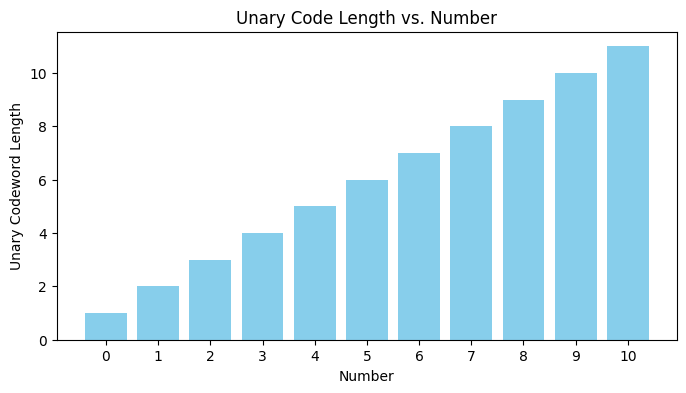

In [6]:
numbers = list(range(11))
code_lengths = [unary_length(number) for number in numbers]  # returns ints

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(numbers, code_lengths, color="skyblue")
ax.set_xlabel("Number")
ax.set_ylabel("Unary Codeword Length")
ax.set_title("Unary Code Length vs. Number")
ax.set_xticks(numbers)
plt.show()

### Notes:
- Unary codes are extremely simple but **inefficient** for large numbers.
- They are prefix codes and therefore uniquely decodable.
- They are useful in some theoretical constructions and as building blocks for Elias codes.